# DIGIT PREPROCESSING

## Imports

In [26]:
from PIL                import Image, ImageFilter
from IPython.display    import Image as show
import numpy as np
from IPython.display    import display

## Functions

In [125]:
def preview(img, title = ''):
    pix_path = '/tmp/pix_output.png'
    img.save(pix_path)
    pic = show(filename=pix_path)
    if title != '': print title
    display(pic)

In [121]:
def black_and_white(img, threshold = 128):
    gray = img.convert('L')        # convert the RGB image to grayscale image
    bw = np.asarray(gray).copy()   # read the grayscale image into an array

    bw[bw < threshold]  = 0        # Black
    bw[bw >= threshold] = 255      # White

    img = Image.fromarray(bw)
    return img

In [131]:
def resize(img, x, y, antialias = None):
    img.thumbnail((x, y), antialias) if antialias else img.thumbnail((x, y))
    return img

In [115]:
def gaussian_blur(img, radius):
    img = img.filter(ImageFilter.GaussianBlur(radius))
    return img

In [149]:
def sharpen(img):
    img.filter(ImageFilter.SHARPEN)
    return img

In [152]:
def print_ascii(img):
    arr = np.asarray(img).copy()
    for row in arr:
        line = ''
        for cell in row:
            result = 0
            if cell == 0:
                result = 1
            line = line + str(result)
        print line

## Digit image paths

In [157]:
DIGITS_FOLDER = '/home/farmer/raspifarm/resources/images/digits'

digitPathFor = {
    "0": DIGITS_FOLDER + '/digit_0_64x64.jpg',
    "1": DIGITS_FOLDER + '/digit_1_64x64.jpg',
    "2": DIGITS_FOLDER + '/digit_2_64x64.jpg',
    "3": DIGITS_FOLDER + '/digit_3_64x64.jpg',
    "4": DIGITS_FOLDER + '/digit_4_64x64.jpg',
    "5": DIGITS_FOLDER + '/digit_5_64x64.jpg',
    "6": DIGITS_FOLDER + '/digit_6_64x64.jpg',
    "7": DIGITS_FOLDER + '/digit_7_64x64.jpg',
    "8": DIGITS_FOLDER + '/digit_8_64x64.jpg',
    "9": DIGITS_FOLDER + '/digit_9_64x64.jpg'
}

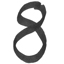

In [134]:
# Example, show a digit
show(digitPathFor['8'])

## Preprocess a digit

original


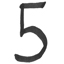

b/w on original


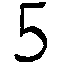

blurred


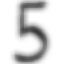

sharpened


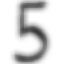

bw on blurred/sharpened


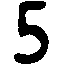

resized


bw on blurred/sharpened/resized


ASCII
00000000111111000000
00000011111111000000
00000011111110000000
00000011000000000000
00000011000000000000
00000011000000000000
00000011000000000000
00000011000000000000
00000011111100000000
00000011111111000000
00000011111111000000
00000000000111100000
00000000000011100000
00000000000001100000
00000000000001100000
00000000000011100000
00000000000111000000
00000111111111000000
00000111111110000000
00000011111000000000


In [156]:
input_digit             = digitPathFor['5']
BW_OUTPUT_PATH          = '/tmp/bw_digit.png'
RESIZED_OUTPUT_PATH     = '/tmp/bw_resized_digit.png'

# Open the digit file and print it
digit = Image.open(input_digit)

preview(digit, 'original')

digit = black_and_white(digit, 144)
preview(digit, 'b/w on original')

digit = gaussian_blur(digit, 6)
preview(digit, 'blurred')

digit = sharpen(digit)
preview(digit, 'sharpened')

digit = black_and_white(digit, 192)
preview(digit, 'bw on blurred/sharpened')

digit = resize(digit, 20, 20)
preview(digit, 'resized')

digit = black_and_white(digit, 96)
preview(digit, 'bw on blurred/sharpened/resized')

print 'ASCII'
print_ascii(digit)